# Car Braking Analysis

Jypyter NoteBook demonstrates the execution of the **CarBrakingAnalysis** simulation sample that calculates the stopping distance.<br><br>
There are two examples:
* #1 Example - runs the **CarBrakingAnalysis** project by changing the mass of the car by 20 kg in oder to see the relationship between vehicle mass and braking distance.<br>
* #2 Example - runs the **CarBrakingAnalysis** project to calculate the stopping distance according to the specified car mass and speed.<br>

To install the pyST.zip use the following command: <code>$ pip install pyST.zip<code>

To run this NoteBook, follow the provided steps:<br>
**Step 1:** Create a client by providing the TWC server, user name and password. <br>
<code>client = SimulationWebClient('TWC_server', 'user_name', 'user_psw', verifySSL=False)</code><br>
<i>Note: If 'user_psw' is not entered, an input field is provided to enter a password.</i>

In [36]:
# Disable SSL warnings
import urllib3
import json
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [23]:
# Create client
from pyST import SimulationWebClient

client = SimulationWebClient('<enter TWC server>', '<enter user name>', '<enter password>', verifySSL=False)

**Step 2:** Add the **CarBrakingAnalysis** simulation project to the TWC server.<br>
**Step 3:** Use the <code>client.get_descriptor('project', config='config')</code> to get a set of specified input and output parameters of a simulation configuration, including their constraints.

In [ ]:
# Get information about the specified simulation configuration in a particular project

client.get_descriptor('CarBrakingAnalysis', config='Vehicle Analysis no Matlab')

### #1 Example
**Step 4:** Run simulation of the **CarBrakingAnalysis** project by changing the mass of the car by 20 kg.

In [ ]:
# Run simulation

mass = [0] * 10
distance = [0] * 10
for x in range(0, 5):
    mass[x] = 800 + 20 * x
    parameters = {
      "inputs":
      {
        "grossMass": mass[x]  
      }
    }
    results = client.simulate('CarBrakingAnalysis', config='Vehicle Analysis no Matlab', commit_results=False, data=json.dumps(parameters))
    distance[x] = results['outputs']['stoppingDistance']
    print(mass[x], distance[x] )

**Step 5:** Run the following cell to draw a chart of the relationship between vehicle mass and braking distance

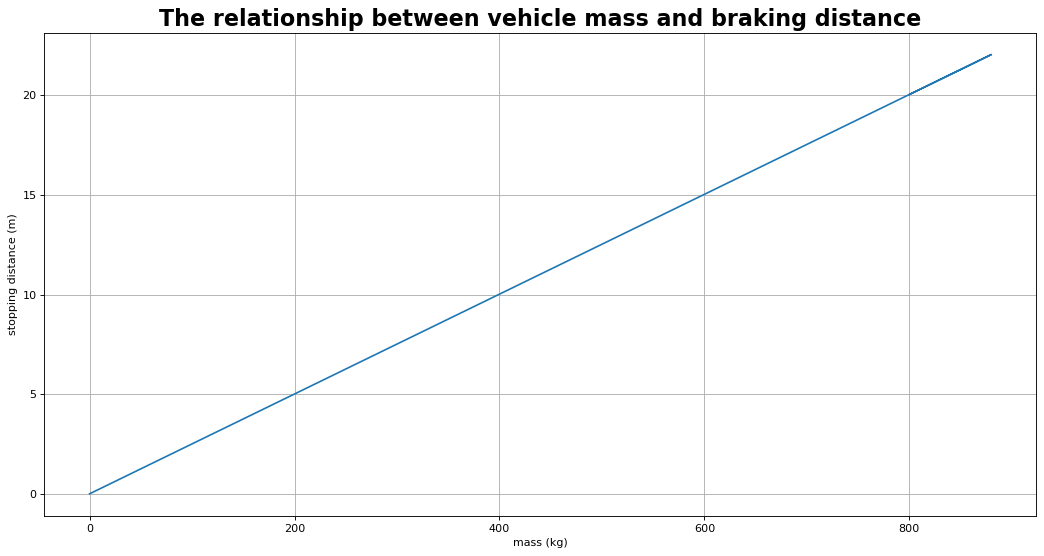

In [34]:
# Draw a chart

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from io import StringIO

figure(figsize=(16, 8), dpi=80)
plt.xlabel('mass (kg)')
plt.ylabel('stopping distance (m)')
plt.title('The relationship between vehicle mass and braking distance', fontweight="bold", fontsize=20)
plt.plot(mass, distance)
plt.grid()
plt.show()

### #2 Example
**Step 6:** Run the 'CarBrakingAnalysis' project to calculate the stopping distance based on the specified car speed and car mass.<br>

In [ ]:
# Run simulation

speed = input("Enter the car speed (km/h):")
totalMass = input("Enter the car mass (kg):")

parameters = {
  "inputs":
  {
    "grossMass": totalMass,
    "speed": speed
  }
}

results = client.simulate('CarBrakingAnalysis', config='Vehicle Analysis no Matlab', data=json.dumps(parameters))
distance = results['outputs']["stoppingDistance"]
requiredDistance = results['outputs']["requiredStoppingDistance"]
print()
print("Stopping distance:", distance)
print()
print()
print("Failed requirements:")
print(json.dumps(results['verification'], indent=2))

**Step 7:** Run the following cell to draw a chart to show the stopping distance with threshold of required maximum stopping distance

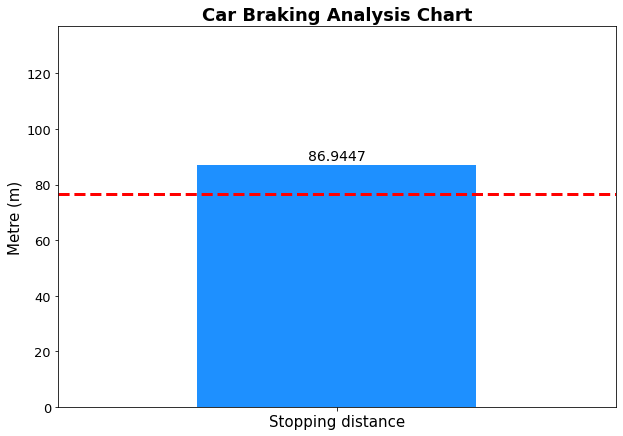

In [30]:
# Draw a chart

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

data = pd.DataFrame(
    {"distance": [distance]})
ax = data.plot(kind='bar',
              figsize=(10,7), color=['dodgerblue'], fontsize=13);
plt.axhline(y=requiredDistance,linewidth=3, linestyle='--', color='r')
ax.set_ylim([0, distance+50])
plt.title("Car Braking Analysis Chart", fontsize=18, weight="bold")
plt.ylabel("Metre (m)", fontsize=15)
plt.text(0, distance+2, round(distance, 4), ha = 'center', fontsize=14)
ax.get_legend().remove()
plt.xticks(np.arange(1), ["Stopping distance"], rotation="horizontal", fontsize=15);